# Nucleotide density around polyA sites

**Purpose**: To visualize the frequency of individual nucleotides surrounding eligible, representative cleavage sites.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## HELPER FUNCTIONS

In [4]:
def calculate_nucleotide_density(data, window):
    
    ## Trim sequence to desired length
    
    sequence = data['sequence'].str.upper()
    
    if (sequence.apply(lambda x : len(x)).nunique() > 1):
        raise ValueError(f"Sequences are not a consistent length: " + str(sequence.apply(lambda x : len(x)).describe()))
    
    trimmed_sequence = sequence.apply(lambda x : x[int((len(x)-window)/2):int((len(x)+window)/2)])
    
    ## Summarize nucleotide content by position
    
    nt_dict = {}
    char_dict = {'A':0, 'C':1, 'G':2, 'T':3, 0:'A', 1:'C', 2:'G', 3:'T'}

    xs = np.arange(-int(window/2),int(window/2),1)
    nt_array = np.zeros((len(xs),4))

    for i,tseq in tqdm.tqdm(trimmed_sequence.iteritems(), total = len(data), desc = 'Summarizing nucleotide density'):
        idxs = np.arange(0,len(xs))

        for j,char in zip(idxs,tseq):

            if (char == 'N'):
                continue

            nt_array[j,char_dict[char]] += 1
            
    return nt_array / np.reshape(np.sum(nt_array, axis = 1), (-1,1))


In [5]:
def plot_nucleotide_density(input_data, window, xtickint, ylim, desc):
    
    ## Subset data based on xlim window
    
    xs = np.arange(-int(window/2),int(window/2),1)
    data = input_data[int((np.shape(input_data)[0]-window)/2):int((np.shape(input_data)[0]+window)/2),:]
    
    ## Visualize nucleotide density across window
    
    fig,ax = plt.subplots(1,1, figsize = (2,1.5))

    # Plot pA-centered nucleotide distribution
    ax.plot(xs, data[:,0]*100, linewidth = 0.75, color = '#cb2026', label = 'A')
    ax.plot(xs, data[:,1]*100, linewidth = 0.75, color = '#35459c', label = 'C')
    ax.plot(xs, data[:,2]*100, linewidth = 0.75, color = '#fcb316', label = 'G')
    ax.plot(xs, data[:,3]*100, linewidth = 0.75, color = '#0c8140', label = 'T')
    print(f'Maximum nucleotide density: A={np.max(data[:,0]):.02%}, C={np.max(data[:,1]):.02%}, G={np.max(data[:,2]):.02%}, T={np.max(data[:,3]):.02%}')

    # Style plot and label axes
    ax.set_xlabel("Position relative to max cleavage site (nt)")
    ax.xaxis.set_major_locator(MultipleLocator(xtickint))
    ax.set_xlim(-int(window/2), int(window/2))

    ax.set_ylabel("Nucleotide frequency (%)")
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.set_ylim(ylim)

    ax.legend(ncol = 4, loc = 'center', bbox_to_anchor = (0.5,1.1))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    plt.savefig(os.path.join(OUTDIR, f'nucleotide_summary.{desc}.window_{window}.svg'), format = 'svg', dpi = 600)
    plt.show()

    return


## IMPORTS AND SETUP

In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'nucleotide_density')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


## ANALYSIS

### Saccharomyces cerevisiae

(40453, 11)


Summarizing nucleotide density: 100%|██████████| 40453/40453 [00:28<00:00, 1413.51it/s]


(1000, 4)
Maximum nucleotide density: A=75.91%, C=31.79%, G=22.00%, T=54.60%


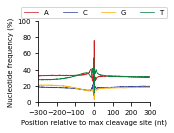

Maximum nucleotide density: A=75.91%, C=31.79%, G=22.00%, T=54.60%


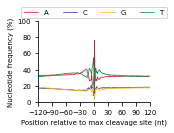

In [7]:
species = 'saccharomyces_cerevisiae'
reads = 10
tfrac = 0.75

repr_sites = pd.read_csv(os.path.join(PROJECT, species, 'data', 'data_generation', 'positives', f'redistA.no_clustered.wild_type.tf_{tfrac}.ru_0.02.reads_{reads}.sorted.eligible-representative_sites-all_dist-5.coding_only.window.formatted.txt'), sep = "\t")
print(repr_sites.shape)

repr_ntd = calculate_nucleotide_density(repr_sites, 1000)
print(np.shape(repr_ntd))

plot_nucleotide_density(repr_ntd, 600, 100, (0,100), f'{species}.no_clustered.tfrac_{tfrac}.ru_0.02.reads_{reads}')
plot_nucleotide_density(repr_ntd, 240,  30, (0,100), f'{species}.no_clustered.tfrac_{tfrac}.ru_0.02.reads_{reads}')


### Schizosaccharomyces pombe

(12678, 11)


Summarizing nucleotide density: 100%|██████████| 12678/12678 [00:08<00:00, 1415.43it/s]


(1000, 4)
Maximum nucleotide density: A=86.73%, C=23.61%, G=20.66%, T=53.64%


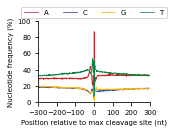

Maximum nucleotide density: A=86.73%, C=23.61%, G=20.66%, T=53.64%


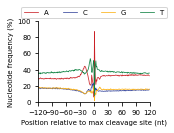

In [8]:
species = 'schizosaccharomyces_pombe'
reads = 5
tfrac = 0.75

repr_sites = pd.read_csv(os.path.join(PROJECT, species, 'data', 'data_generation', 'positives', f'redistA.no_clustered.wild_type.tf_{tfrac}.ru_0.02.reads_{reads}.sorted.eligible-representative_sites-all_dist-5.coding_only.window.formatted.txt'), sep = "\t")
print(repr_sites.shape)

repr_ntd = calculate_nucleotide_density(repr_sites, 1000)
print(np.shape(repr_ntd))

plot_nucleotide_density(repr_ntd, 600, 100, (0,100), f'{species}.no_clustered.tfrac_{tfrac}.ru_0.02.reads_{reads}')
plot_nucleotide_density(repr_ntd, 240,  30, (0,100), f'{species}.no_clustered.tfrac_{tfrac}.ru_0.02.reads_{reads}')


### Arabidopsis thaliana

(47618, 11)


Summarizing nucleotide density: 100%|██████████| 47618/47618 [00:33<00:00, 1420.85it/s]


(1000, 4)
Maximum nucleotide density: A=76.24%, C=26.81%, G=25.99%, T=58.59%


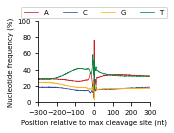

Maximum nucleotide density: A=76.24%, C=26.81%, G=25.99%, T=58.59%


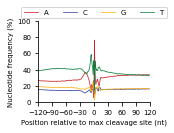

In [9]:
species = 'arabidopsis_thaliana'
reads = 10
tfrac = 0.75

repr_sites = pd.read_csv(os.path.join(PROJECT, species, 'data', 'data_generation', 'positives', f'redistA.no_clustered.wild_type.tf_{tfrac}.ru_0.02.reads_{reads}.sorted.eligible-representative_sites-all_dist-5.coding_only.window.formatted.txt'), sep = "\t")
print(repr_sites.shape)

repr_ntd = calculate_nucleotide_density(repr_sites, 1000)
print(np.shape(repr_ntd))

plot_nucleotide_density(repr_ntd, 600, 100, (0,100), f'{species}.no_clustered.tfrac_{tfrac}.ru_0.02.reads_{reads}')
plot_nucleotide_density(repr_ntd, 240,  30, (0,100), f'{species}.no_clustered.tfrac_{tfrac}.ru_0.02.reads_{reads}')
